# Installing dependencies

In [5]:
!nvidia-smi

Thu Feb 22 07:12:42 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    34W /  70W |  14681MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvidia-smi --query-compute-apps=pid --format=csv,noheader | awk '{print $1}' | xargs -r kill -9

In [2]:
!pip install diffusers
!pip install torch torchvision torchaudio
!pip install diffusers
!pip install transformers scipy ftfy accelerate

# Setting up the pipeline

In [2]:
from diffusers import DiffusionPipeline
import torch

base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")
base.enable_freeu(s1=0.6, s2=0.4, b1=1.1, b2=1.2)

refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")
refiner.enable_freeu(s1=0.6, s2=0.4, b1=1.1, b2=1.2)

/opt/conda/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/opt/conda/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

# Inference

In [3]:
prompt=" A man wearing a dark jumpsuit suit walking down the halls of a factory, low resolution, grainy, bird's eye view, photorealistic"

In [3]:
prompt="(CCTV Footage)2 of A man wearing a dark jumpsuit suit walking down the halls of a factory, (high-angle shot)2"

  0%|          | 0/32 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/diffusers/utils/torch_utils.py:106: UserWarning: ComplexHalf support is experimental and many operators don't support it yet. (Triggered internally at ../aten/src/ATen/EmptyTensor.cpp:30.)
  x_freq = fftn(x, dim=(-2, -1))


  0%|          | 0/8 [00:00<?, ?it/s]

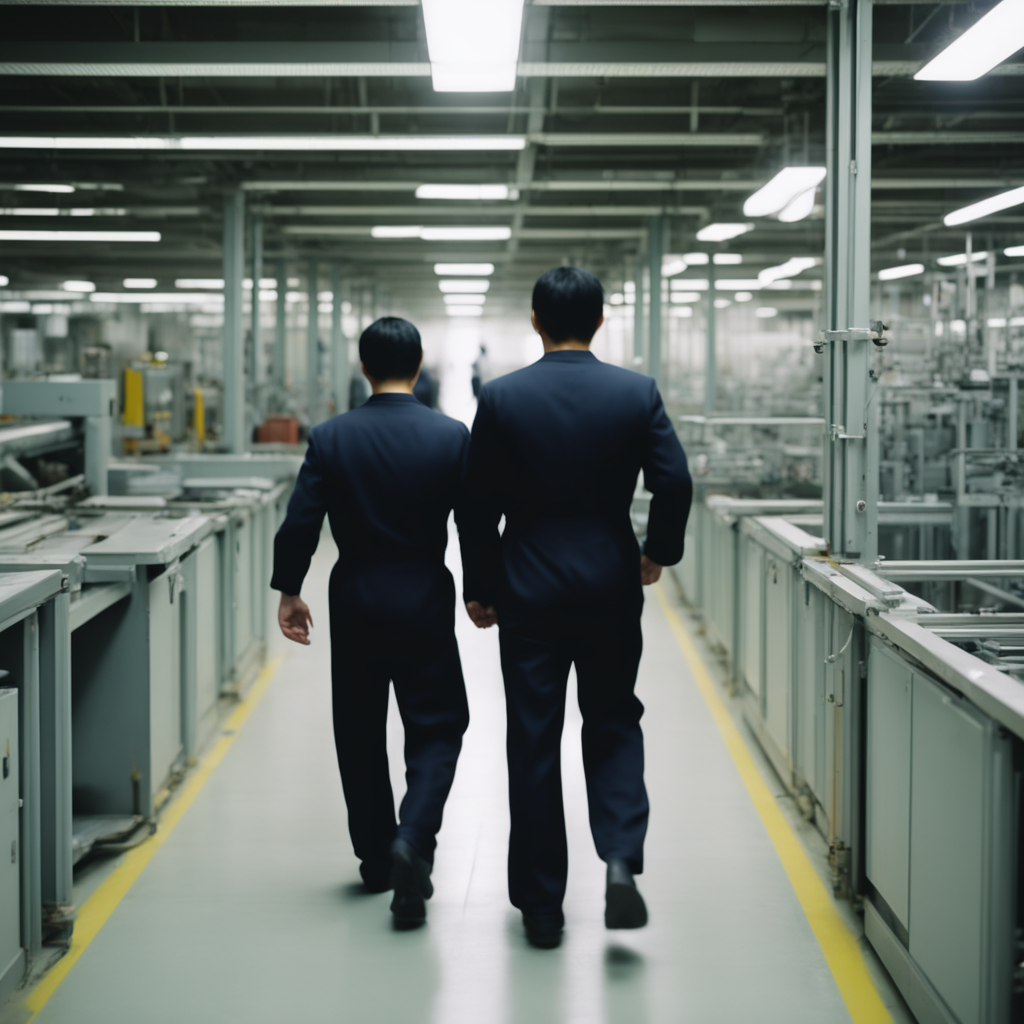

In [4]:
image = base(
    prompt=prompt,
    num_inference_steps=40,
    denoising_end=0.8,
    output_type="latent",
).images
image = refiner(
    prompt=prompt,
    num_inference_steps=40,
    denoising_start=0.8,
    image=image,
).images[0]
image

# Saving Images

In [10]:
import os
os.makedirs("task2",exist_ok=True)

In [13]:
def save_images(images,index):
    from PIL import Image
    pil_image = images[0]
    # the PIL image to a file
    pil_image.save(f"task2/generated_image_{index+1}.png")

In [ ]:
# Assuming compel, pipeline, and other necessary imports and functions are defined
from IPython.display import display
prompt = [
    "(CCTV Footage)2 of A man wearing a dark jumpsuit suit walking down the halls of a factory, (high-angle shot)2",
]

# Generate and save 50 images
for i in range(2):
    generator = [torch.Generator().manual_seed(i + 23)]  # Update seed for each image
    conditioning, pooled = compel(prompt)
    images = pipeline(prompt_embeds=conditioning, pooled_prompt_embeds=pooled, generator=generator, num_inference_steps=10).images
    
    # Assuming `images` is a batch with a single image
    save_images(images, i)  # Save each image with a unique index
    display(images[0])
